In [1]:
!pip install opencv-python numpy matplotlib

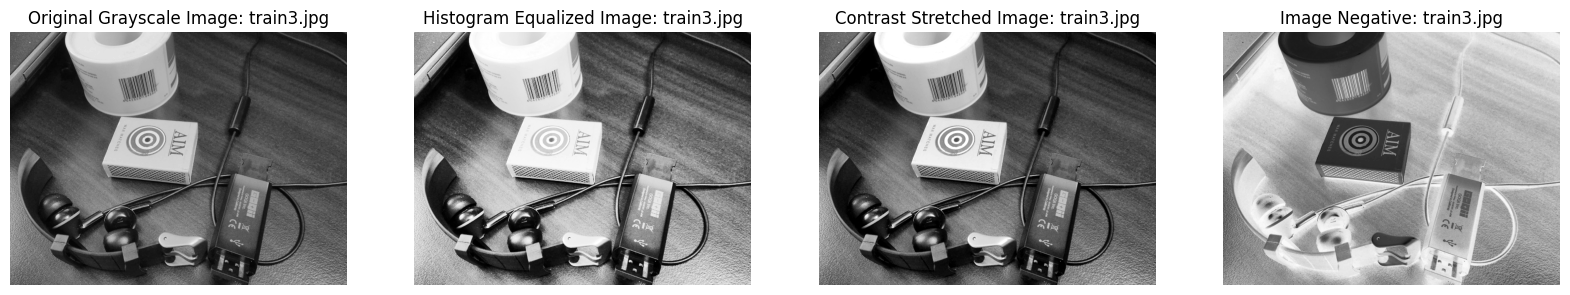

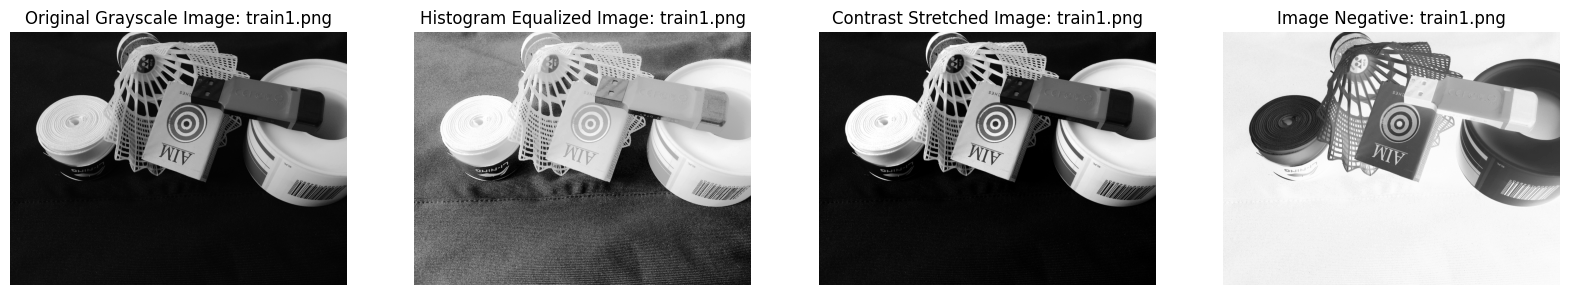

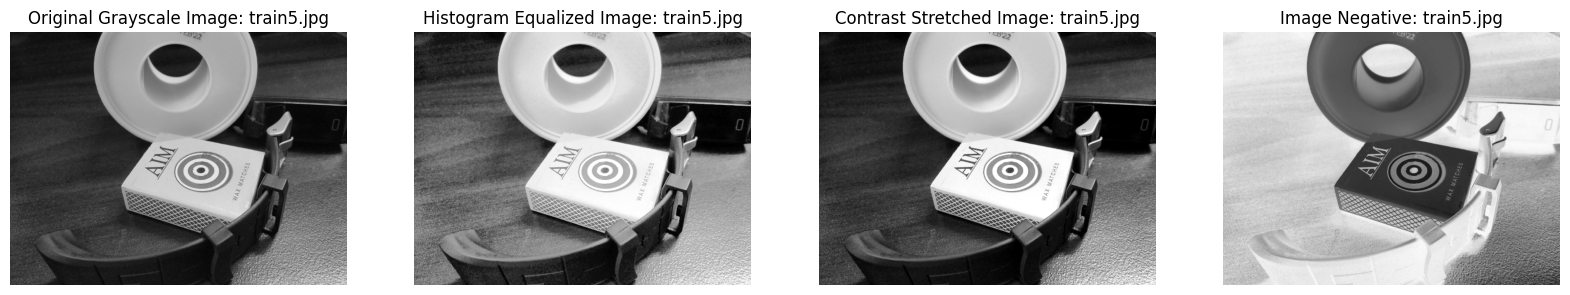

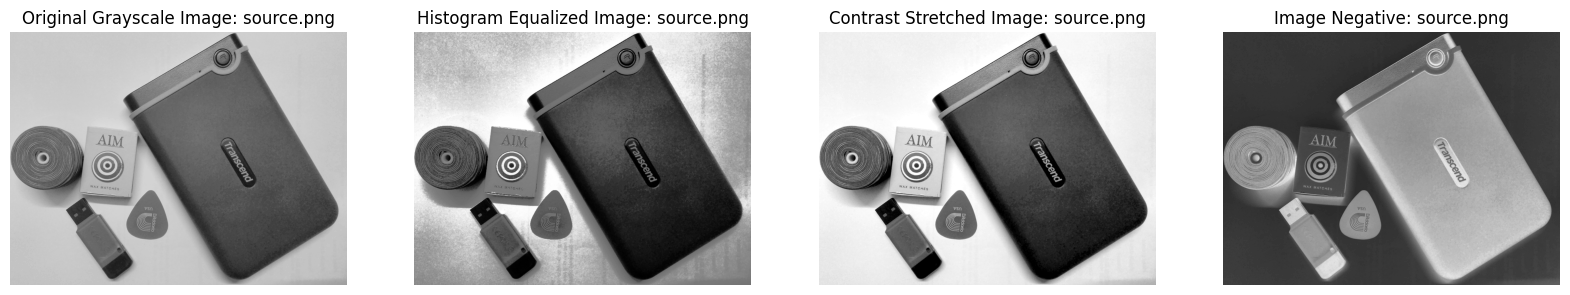

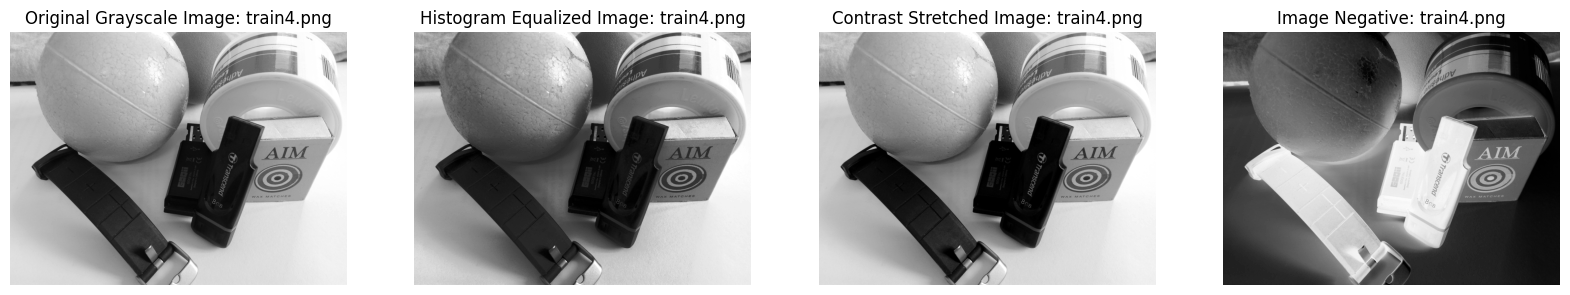

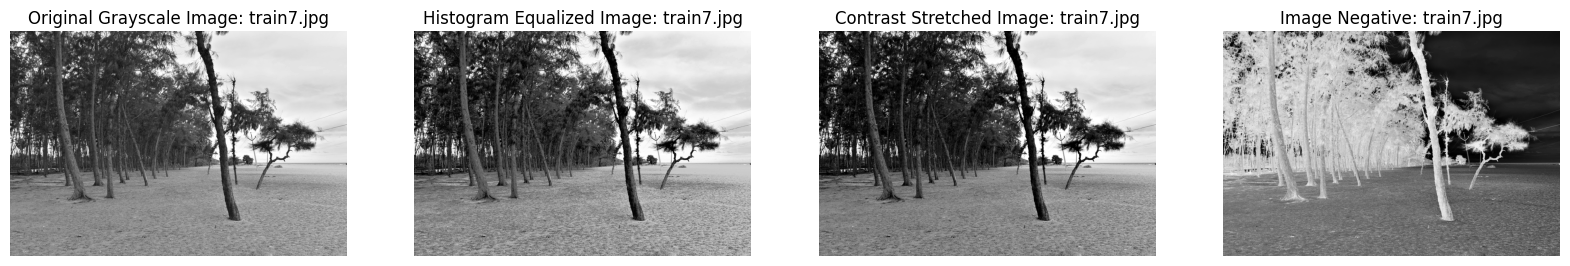

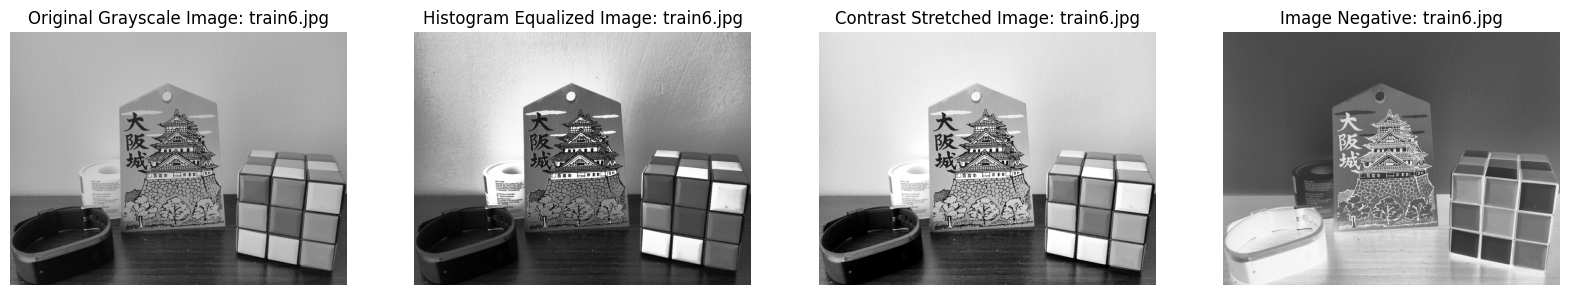

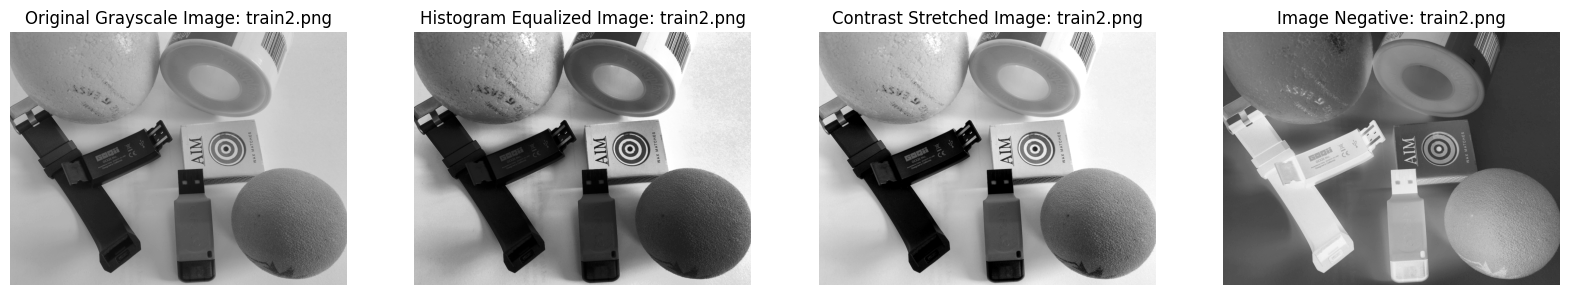

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to apply enhanced contrast stretching
def enhanced_contrast_stretching(image, lower_percentile=2, upper_percentile=98):
    # Compute lower and upper percentile values
    lower_value = np.percentile(image, lower_percentile)
    upper_value = np.percentile(image, upper_percentile)
    
    # Apply contrast stretching formula
    stretched_image = (image - lower_value) * (255 / (upper_value - lower_value))
    stretched_image = np.clip(stretched_image, 0, 255)  # Ensure values stay in valid range
    return stretched_image.astype(np.uint8)

# Function to apply histogram equalization
def histogram_equalization(image):
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

# Function to apply image negative
def image_negative(image):
    # Compute the negative of the image
    negative_image = 255 - image
    return negative_image

# Directory containing the images
image_directory = '/kaggle/input/scenery-dataset/images/'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Loop through each image in the directory
for image_file in image_files:
    # Construct the full image path
    image_path = os.path.join(image_directory, image_file)

    # Load the color image
    image = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Failed to load {image_file}")
        continue

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    equalized_image = histogram_equalization(gray_image)

    # Apply enhanced contrast stretching
    stretched_image = enhanced_contrast_stretching(gray_image)

    # Apply image negative
    negative_image = image_negative(gray_image)

    # Display the original, histogram-equalized, contrast-stretched, and image negative side by side
    plt.figure(figsize=(20, 10))

    # Display original grayscale image
    plt.subplot(1, 4, 1)
    plt.title(f'Original Grayscale Image: {image_file}')
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    # Display histogram-equalized grayscale image
    plt.subplot(1, 4, 2)
    plt.title(f'Histogram Equalized Image: {image_file}')
    plt.imshow(equalized_image, cmap='gray')
    plt.axis('off')

    # Display contrast-stretched grayscale image
    plt.subplot(1, 4, 3)
    plt.title(f'Contrast Stretched Image: {image_file}')
    plt.imshow(stretched_image, cmap='gray')
    plt.axis('off')

    # Display image negative
    plt.subplot(1, 4, 4)
    plt.title(f'Image Negative: {image_file}')
    plt.imshow(negative_image, cmap='gray')
    plt.axis('off')

    plt.show()
